# PART II

### Question 1.
Create a new notebook, import the necessary analysis and visualization libraries, then import your most up-to-date project data (i.e., the data set with your new customer data from the first part of this task).

In [2]:
# Import ;libarires
import pandas as pd
import numpy as np
import os
import csv
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [3]:
# Create a path
path = r'C:\Users\SuperHome\Documents\Instacart Basket Analysis'

In [4]:
# Import the newest dataframe which combined all
cus_ord = pd.read_pickle(os.path.join(path,'02 Data','Prepared Data','cus_ord_merged_final.pkl'))

In [5]:
# Checking dataframe after importing
cus_ord.head(2)

,user_id,Gender,State,Age,n_dependants,fam_status,income,order_id,order_number,day_of_week,...,prices,price_range,Busiest_day,busiest_period_of_day,max_order,loyalty_flag,average_price,spending_flag,median_days_since_prior_order,frequency_flag
0,26711,Female,Missouri,48,3,married,165665,2543867,5,1,...,9.0,Mid-range product,two_busiest days,Most orders,8,new customer,7.988889,low spender,19.0,Regular customer
1,26711,Female,Missouri,48,3,married,165665,1285508,7,5,...,9.0,Mid-range product,regularly busy,Most orders,8,new customer,7.988889,low spender,19.0,Regular customer


### Question 2.
Create a bar-chart, a histogram, a scatterplot, and a line chart, using a sample subset for the line chart.

##### 1).Bar-chart

In [6]:
cus_ord['day_of_week'].value_counts()

0    6203329
1    5659298
6    4495887
2    4213105
5    4205076
3    3839865
4    3783172
Name: day_of_week, dtype: int64

###### Here, 0-6 indicates week day 'Monday-Sunday', starting from 0 means Saturday, Sunday and so on. I would like to change those numbers to actually in weekday's name instead

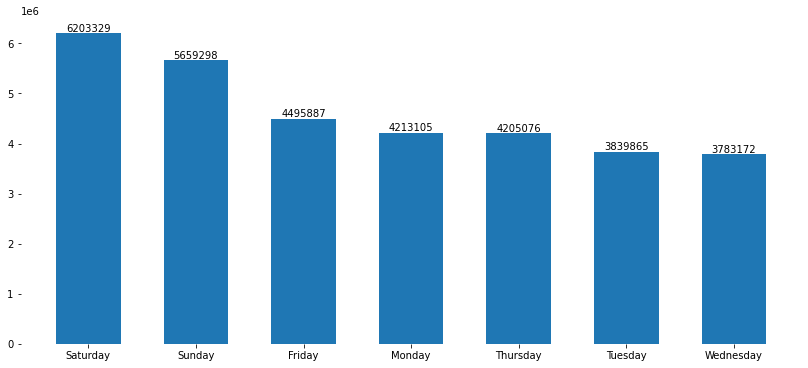

In [22]:
day = ['Saturday','Sunday','Friday','Monday','Thursday','Tuesday','Wednesday']
value = cus_ord['day_of_week'].value_counts()

fig, ax = plt.subplots(figsize = (14, 6))
bar = plt.bar(day, value, width = 0.6)

# Create the label for the bar
for a, b, label in zip(day, value, value):
    plt.text(a,
            b,
            label,
           ha = 'center',
            va = 'bottom')
# Remove the side border
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)

# Save bar-chart as png
plt.savefig(os.path.join(path,'04 Analysis','bar_day_of_week.png'))
plt.show()

##### 2). Create a histogram chart

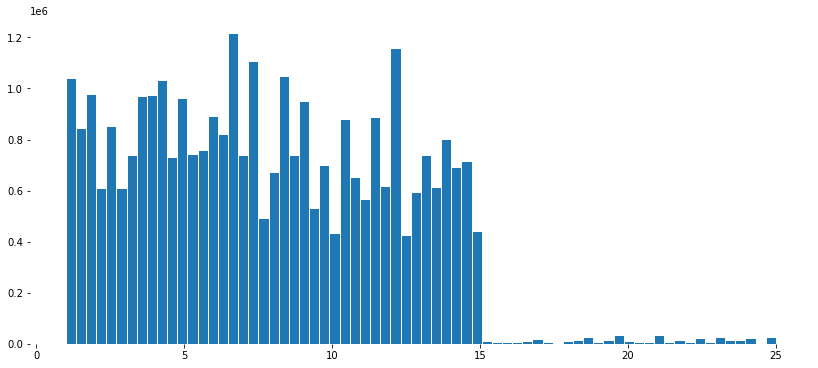

In [14]:
fig, ax = plt.subplots(figsize = (14, 6))
plt.hist(cus_ord['prices'], bins = 70, edgecolor = 'w')

# Remove the side border
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)

# Save histogram chart as png
plt.savefig(os.path.join(path,'04 Analysis','price_hist.png'))
plt.show()

##### I also want to check the order number by using the histogram 

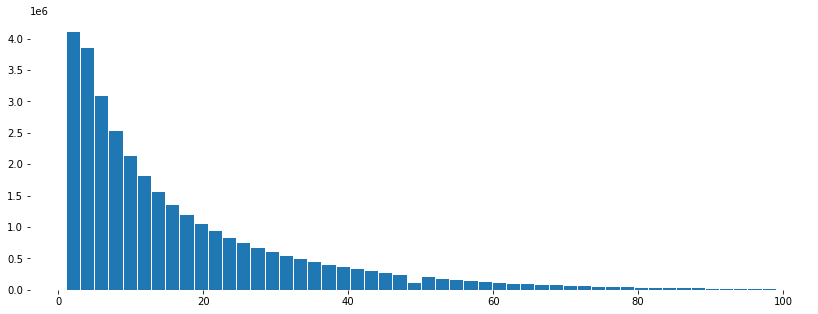

In [23]:
fig, ax = plt.subplots(figsize = (14, 5))
plt.hist(cus_ord['order_number'], bins = 50, edgecolor = 'w')
# Remove the side border
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)

# Save histogram chart as png
plt.savefig(os.path.join(path,'04 Analysis','order_number_hist.png'))
plt.show()

##### 3). Create a scatterplot chart

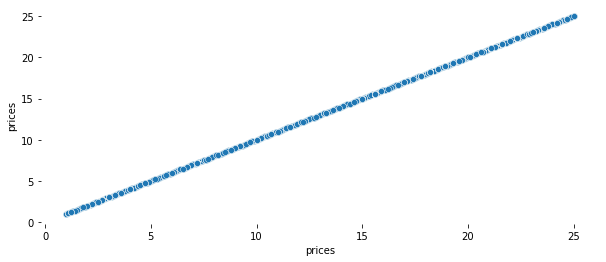

In [29]:
fig, ax = plt.subplots(figsize = (10, 4))
sns.scatterplot(x='prices', y= 'prices',data = cus_ord)

# Remove the side border
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)

# Save scattorplot chart as png
plt.savefig(os.path.join(path,'04 Analysis','price_sctp.png'))
plt.show()

#### The price range as showed above indicates there is no outer exist after cleaning the dataframe.

##### 4). Create a line-chart by using subset

In [33]:
# Create a list holding Trur/False values to the test np.random.rand() <= 0.7
dev = np.random.rand(len(cus_ord)) <= 0.7

In [34]:
# Store 70% fo the sample in the dataframe big
big = cus_ord[dev]

In [35]:
# Store 30% of the sample in the dataframe samll 
small = cus_ord[~dev]

In [36]:
# Checking the len of the datafram
len(cus_ord)

32399732

In [38]:
# Checking if match from big and small dataframe
len(big) + len(small)

32399732

In [39]:
sample = small[['day_of_week','prices']]

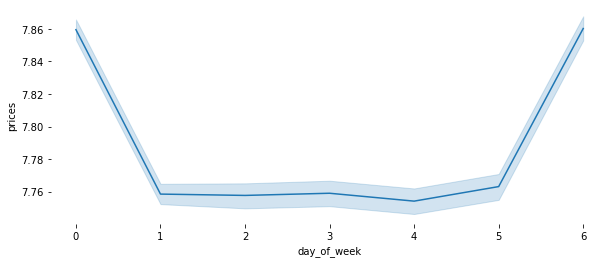

In [49]:
# Now we can create the line chart by using the sampling dataframe
fig, ax = plt.subplots(figsize = (10, 4))
sns.lineplot(data = sample, x = 'day_of_week', y = 'prices')

# Remove the side border
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)

# Save lineplot chart as png
plt.savefig(os.path.join(path,'04 Analysis','lineplot.png'))
plt.show()

### Question 3.
You need to provide the Instacart senior stakeholders with descriptive findings about sales. Create a histogram of the “order_hour_of_day” column.
In a markdown cell beneath your histogram, describe what the histogram demonstrates.

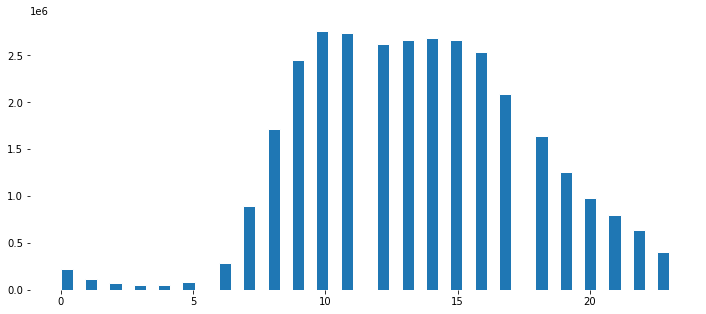

In [43]:
# Create a histogram chart by  'order_hour_of_day'
fig, ax = plt.subplots(figsize = (12, 5))
plt.hist(cus_ord['order_hour_of_day'], bins = 50 , edgecolor = 'w')

# Remove the side border
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)

# Save histogram chart as png
plt.savefig(os.path.join(path,'04 Analysis','order_hour_of_day_hist.png'))
plt.show()

###### This peak value as shows above with number 10 means the busiest order hour is 10am, then followed by 11am. Through 10am to 15pm are all busy order hours through the day. After 15pm, the order goes down untill 0am. Customers usually don't like order in the eraly morning which also shows through 0am to 4am as there is only a few orders happen. When customers wake up in the morning staring from 5am, the orders becom more and more till 15pm.

### Question 4.
The marketing team is curious about the distribution of orders among customers in terms of loyalty. Create a bar chart from the “loyalty_flag” column.

In [44]:
cus_ord['loyalty_flag'].value_counts(dropna=False)

regular customer    15874128
loyal customer      10282763
new customer         6242841
Name: loyalty_flag, dtype: int64

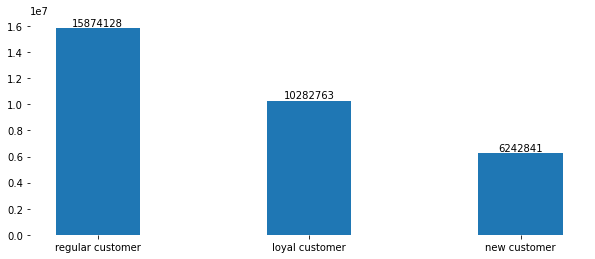

In [48]:
# Create a bar chart
customer = ['regular customer','loyal customer','new customer']
value1 = cus_ord['loyalty_flag'].value_counts()
fig, ax = plt.subplots(figsize = (10, 4))
plt.bar(customer, value1, width = 0.4)

# Create the label for the bar
for a, b, label in zip(customer, value1, value1):
    plt.text(a,
            b,
            label,
           ha = 'center',
            va = 'bottom')
# Remove the side border
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)

# Save bar-chart as png
plt.savefig(os.path.join(path,'04 Analysis','bar_loyalty_falg.png'))
plt.show()

### Question 5.
Check whether there’s a difference in expenditure (the “prices” column) depending on the hour of the day. (Hint: To check this, you need to use an accurate sample for your line chart!)

###### As we haved already created the sampling dataframe, I will continue to use it to create another line chart

In [52]:
sample2 = small[['order_hour_of_day','prices']]

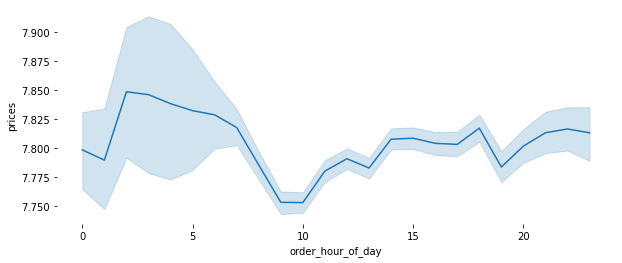

In [53]:
# Create another line chart to demostrate the prices based one the order hour of day
fig, ax = plt.subplots(figsize = (10, 4))
sns.lineplot(data = sample2, x = 'order_hour_of_day', y = 'prices')

# Remove the side border
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)

# Save lineplot chart as png
plt.savefig(os.path.join(path,'04 Analysis','line_order_hour_of_day.png'))
plt.show()

### Question 6.
Now that you have information about customers, you need to conduct some exploratory analysis of customer demographics to inform the targeted marketing campaigns. First, determine whether there’s a connection between age and family situation by creating a line chart exploring the connections between age and number of dependents:

In a markdown cell beneath your line chart, describe what the line chart shows.

In [62]:
sample3 = small[['n_dependants', 'Age']]

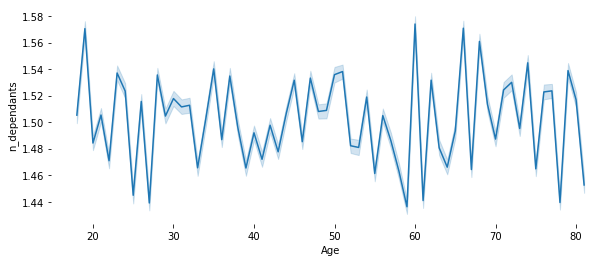

In [64]:
# Create lineplot 
fig, ax = plt.subplots(figsize = (10, 4))
sns.lineplot(data = sample3, x = 'Age', y = 'n_dependants')

# Remove the side border
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)

# Save lineplot chart as png
plt.savefig(os.path.join(path,'04 Analysis','line_n_dep_age.png'))
plt.show()

This line chart shows our customers age range is through 19 to 81.

We have several peak values as age 19, age 60 and age around 65 all have the most dependants number around average number of 1.57.

Age around 59 has the fewest number of dependants as shows close to 0. However, most of the ages have at least average of 1 dependant.

### Question 7.
You’ll also need to explore whether there’s a connection between age and spending power (income). To visualize this relationship, create a scatterplot using the sns.scatterplot() function.
In a markdown cell beneath your scatterplot, describe what the scatterplot shows.

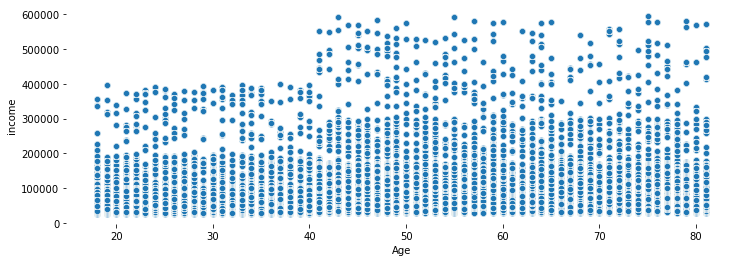

In [60]:
# Create another scatterplot to show the connection between age and income
fig, ax = plt.subplots(figsize = (12, 4))
sns.scatterplot(x = 'Age', y = 'income', data = cus_ord)

# Remove the side border
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)

# Save scattorplot chart as png
plt.savefig(os.path.join(path,'04 Analysis','age_income_sctp.png'))
plt.show()

In [69]:
cus_ord['income'].value_counts()

72344     4395
112610    4282
57501     4136
115620    3891
36163     3657
          ... 
137854       3
230089       3
168517       3
41151        3
147660       2
Name: income, Length: 108012, dtype: int64

The income increases by the age increases, as age 20 to 40 group of customers have the total of highest income  40000, and age above 40 group of customers have the total income which is much higher than 20 to 40 age group, with the total income around 60000.

Age above 40 group of customers abusolutely hava a strong income range and spending ability than those who are under 40 year old group of customers.

The yougest age group of customers have the lowest income totally and that is make sence because most of them would be students or newer workers.